In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

/tmp/ipykernel_623/3833882101.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Beat Tracking - Estimated Tempo: {float(tempo):.2f} BPM")


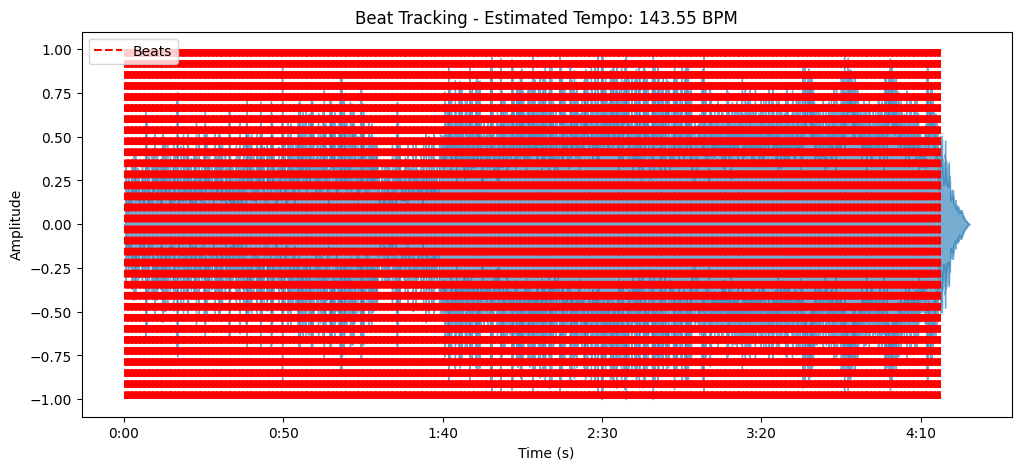

Estimated Tempo: 143.55 BPM
Beat Times: [  0.44117914   0.88235828   1.30031746   1.7414966    2.13623583
   2.55419501   2.9721542    3.41333333   3.78485261   4.20281179
   4.59755102   5.0155102    5.41024943   5.82820862   6.22294785
   6.66412698   7.05886621   7.45360544   7.84834467   8.26630385
   8.66104308   9.12544218   9.52018141   9.93814059  10.33287982
  10.77405896  11.16879819  11.58675737  12.00471655  12.39945578
  12.79419501  13.2121542   13.60689342  14.02485261  14.41959184
  14.81433107  15.20907029  15.62702948  16.02176871  16.4861678
  16.90412698  17.32208617  17.69360544  18.11156463  18.52952381
  18.94748299  19.31900227  19.76018141  20.15492063  20.59609977
  20.990839    21.40879819  21.80353741  22.19827664  22.61623583
  23.03419501  23.42893424  23.82367347  24.2184127   24.61315193
  25.05433107  25.47229025  25.86702948  26.28498866  26.70294785
  27.12090703  27.51564626  27.9568254   28.35156463  28.74630385
  29.16426304  29.60544218  30.023401

/tmp/ipykernel_623/3833882101.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Estimated Tempo: {float(tempo):.2f} BPM")


In [3]:

# Load audio file
audio_file = 'Inputs/processed/song.wav'  # Replace with your file
y, sr = librosa.load(audio_file)

# Detect tempo and beats
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# Convert beat frames to time
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# Plot waveform with beats
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.vlines(beat_times, ymin=-1, ymax=1, color='r', linestyle='--', label="Beats")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(f"Beat Tracking - Estimated Tempo: {float(tempo):.2f} BPM")
plt.legend()
plt.show()

# Print detected beats
print(f"Estimated Tempo: {float(tempo):.2f} BPM")
print(f"Beat Times: {beat_times}")


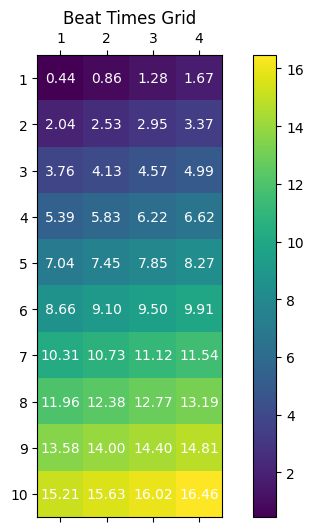

In [11]:


# Define the grid size based on the number of beat times
grid_size = (10, 4)  # You can adjust this based on the total number of beats

# Create a grid to plot beat times
fig, ax = plt.subplots(figsize=(8, 6))

# Reshape the beat times into a grid shape
beat_grid = np.reshape(beat_times[:grid_size[0] * grid_size[1]], grid_size)

# Plot the grid as a heatmap
cax = ax.matshow(beat_grid, cmap='viridis')

# Set the axis labels
ax.set_xticks(np.arange(grid_size[1]))
ax.set_yticks(np.arange(grid_size[0]))
ax.set_xticklabels(np.arange(1, grid_size[1] + 1))
ax.set_yticklabels(np.arange(1, grid_size[0] + 1))

# Display the beat times in the grid
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        ax.text(j, i, f"{beat_grid[i, j]:.2f}", ha="center", va="center", color="white")

# Add colorbar for visual clarity
fig.colorbar(cax)

plt.title("Beat Times Grid")
plt.show()


In [4]:
y, sr = librosa.load(audio_file)
y_percussive = librosa.effects.percussive(y)
y_harmonic = librosa.effects.harmonic(y)
sf.write('Inputs/processed/songP.wav', y_percussive, sr)
sf.write('Inputs/processed/songh.wav', y_harmonic, sr)